# Atividade 2 da Disciplina de Matemática Computacional
**Índice**

* [Parte 1](#Parte-1)
    * [Funções e Dados Utilitários](#data-func-utils)
    * [Função calcIntercepts(ci, t)](#calc-intercepts)
    * [Função plot_reta(intercept, ax)](#plot-reta)
    * [Plotagem de resultados](#Plotagem-de-resultados)
    * [Função com pontos de inclinação](#results-a12)
* [Parte 2](#Parte-2)
    * [Funções e Dados Utilitários](#util-data-2)
    * [Função gradient_descent_2p](#gradient)
    * [Plotagem e resultados](#plot-2)


# Parte 1
<a id= "data-func-utils"></a>
## Funções e Dados Utilitários
**Função ssr(i)**
É a função de erro baseada em um valor de intercept e na soma dos termos: y - (intercept + 0.64 * x)²;

**Função dssr(i)**
É a função que calcula a derivada da função de erro para um determinado intercept que é nossa inclinação em um determinado ponto;

**Função calc_step_size(i, l)** Função que recebe a taxa de aprnedizagem e o intercept e calcula o step size;

*x*, *y* e *p* são dados utilizados nas funções ssr e dssr, enquanto a lista *t* guarda os learning rates utilizados.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Funções auxiliares

# Dados
x = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])
p = 0.64

# Taxas de aprendizagem
t = [0.1, 0.3]

# Função SSR
def ssr(i):
    return np.sum((y - (i + p * x))**2)

# função que recebe um valor intercept e calcula a derivada
def dssr(i):
    return np.sum(-2 * (y - (i + p * x)))

# função que calcula o step size, recebendo interceot i e taxa de aprendizado l
def calc_step_size(i, l):
    return dssr(i) * l

<a id= "calc-intercepts"></a>
## Função calcIntercepts(ci, t)
Essa função recebe um intercept inicial e a taxa de aprendizagem e retorna uma lista de intercepts seguindo o processo dos slides:

**newIntercept** = *oldIntercept - step_size*

Onde **step_size**= *learning_rate x inclinação*

Escolhi dois termos para parada: epocas = 10 e loss = 0.002

**epocas**: Número de vezes que o processo vai repetir;

**loss**: Se o loss for menor ou igual a loss o processor se encerra antes das epocas serem completadas.

In [6]:
# função para encontrar os intercepts de cada interação
# ci -> currente intercept
# t -> taxa de aprendizado
def calcIntercepts(ci, t):
    interceptList = []
    interceptList.append(ci) # inclui o intercept inicial
    interaux = ci

    epocas = 10
    loss = 0.002
    for i in range(epocas):
        sz = calc_step_size(interaux, t)
        interaux = interaux - sz
        interceptList.append(interaux)
        if ssr(interaux) <= loss:
            return interceptList
    
    return interceptList


<a id= "plot-reta"></a>
## Função plot_reta(intercept, ax)
Recebe um intercept e um ax do quadro. Dessa forma ele utiliza a função **y = intercept + 0.64 x X** para desenhar a reta no ax. Além da reta, a função adiciona os dados reais, que são representados pelos pontos verdes.


In [20]:

def plot_reta(intercept, ax):

    y_pred_line = intercept + p * x

    # Criar reta em domínio maior para visualização
    x_line = np.linspace(0, 3.2, 100)
    y_line = intercept + p * x_line

    # Reta
    ax.plot(x_line, y_line, color='teal', linewidth=3, label=f"Reta: y = {intercept:.2f} + 0.64x")

    # Pontos reais
    ax.scatter(x, y, 
                color='limegreen', s=300, label='Pontos Reais')

    for highlight_index in range(3):
        # Linha vertical do ponto até a reta
        y_pred = intercept + p * x[highlight_index]
        ax.plot([x[highlight_index], x[highlight_index]],
                 [y[highlight_index], y_pred],
                 color='red', linewidth=3, linestyle= '--')

    ax.set_title(f"Reta para intercept = {intercept:.3f}")
    ax.set_xlabel("Weight")
    ax.set_ylabel("Height")
    ax.legend()



## Plotagem de resultados
Os quadros na esquerda representa os resultados para o **learning rate = 0.1**, enquanto os resultados da direita para o **learning rate = 0.3**. A cada interação um novo intercept é utilizado para desenhar a reta o ajuste em relação aos valores reais. Podemos notar que os **step sizes** dos quadros da direita são bem maiores que os da esquerda. Isso ocorre por conta da utilização de **learning rates** diferentes.

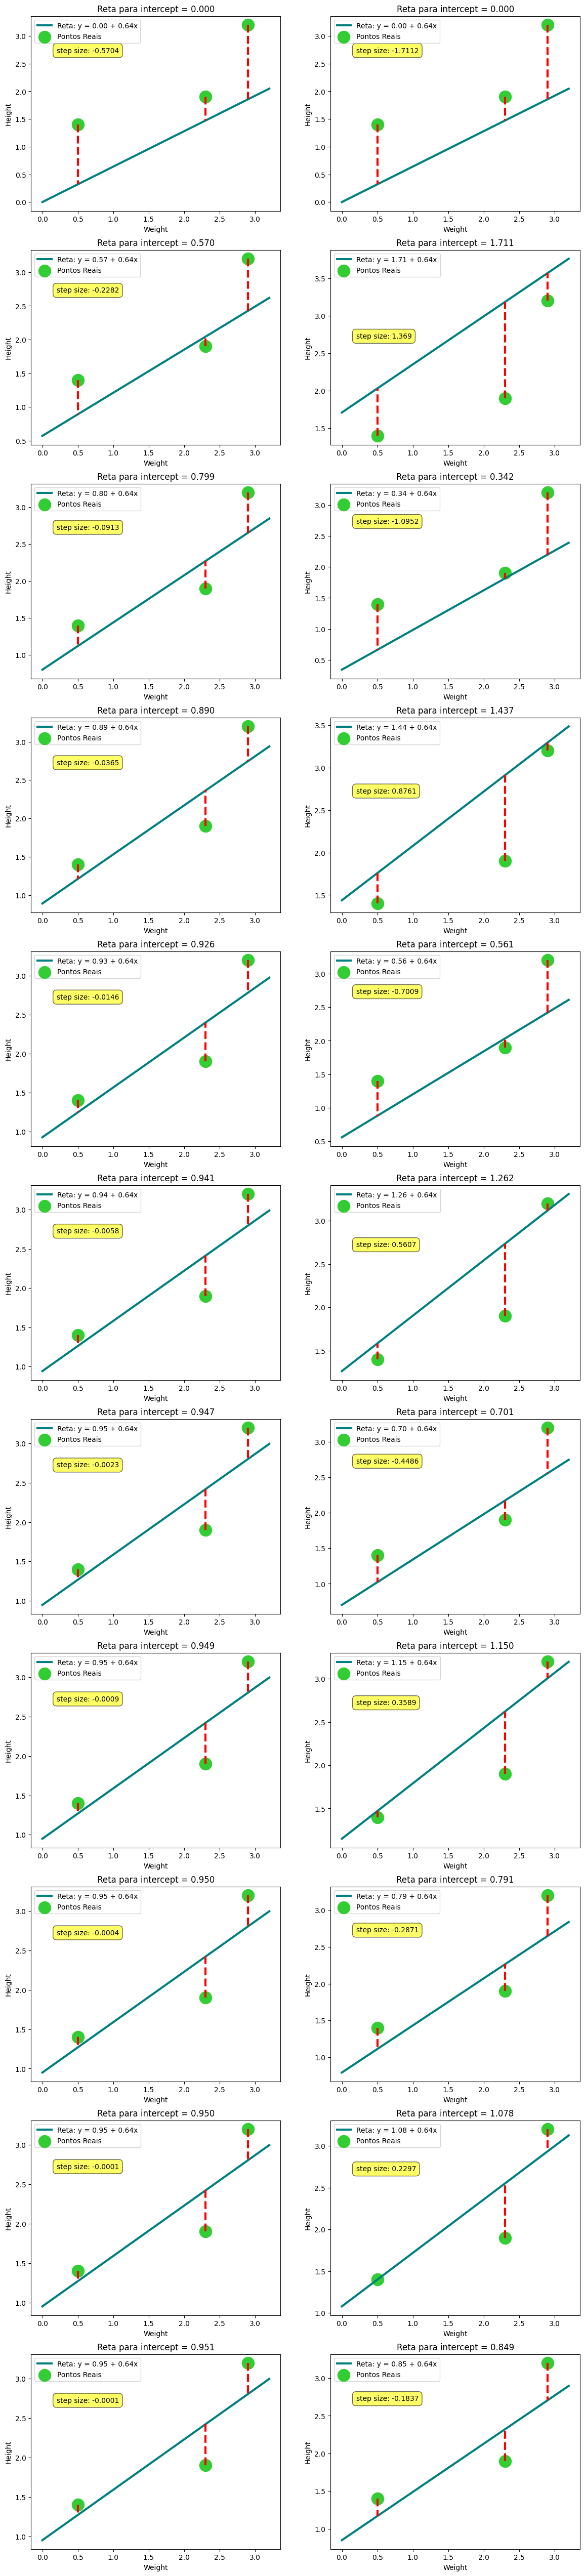

In [21]:
fig, axes = plt.subplots(ncols=2, nrows=11, figsize=(14, 65))
for l in range(len(t)):
    interaux2 = calcIntercepts(0, t[l])
    for i in range(len(interaux2)):
        plot_reta(interaux2[i], axes[i][l])
        axes[i][l].text(0.20, 2.7, 
                     f'step size: {round(calc_step_size(interaux2[i], t[l]), 4)}',
                     fontsize=10, 
                     bbox=dict(facecolor='yellow', alpha=0.6, boxstyle='round,pad=0.5'))

plt.grid(False)
plt.show()

<a id= "results-a12"></a>
## Função SSR com pontos de inclinação
Após verificar  os resultados na reta dos valores, verificamos como cada **intercept** influenciou os pontos de inclinação na função **ssr**, e a comparação de como ocorreu a diminuição do erro para cada **learnig rate** usado. Nesse caso, os dois iniciam com *intercept = 0* e apartir daí vão tentando achar o mínimo.

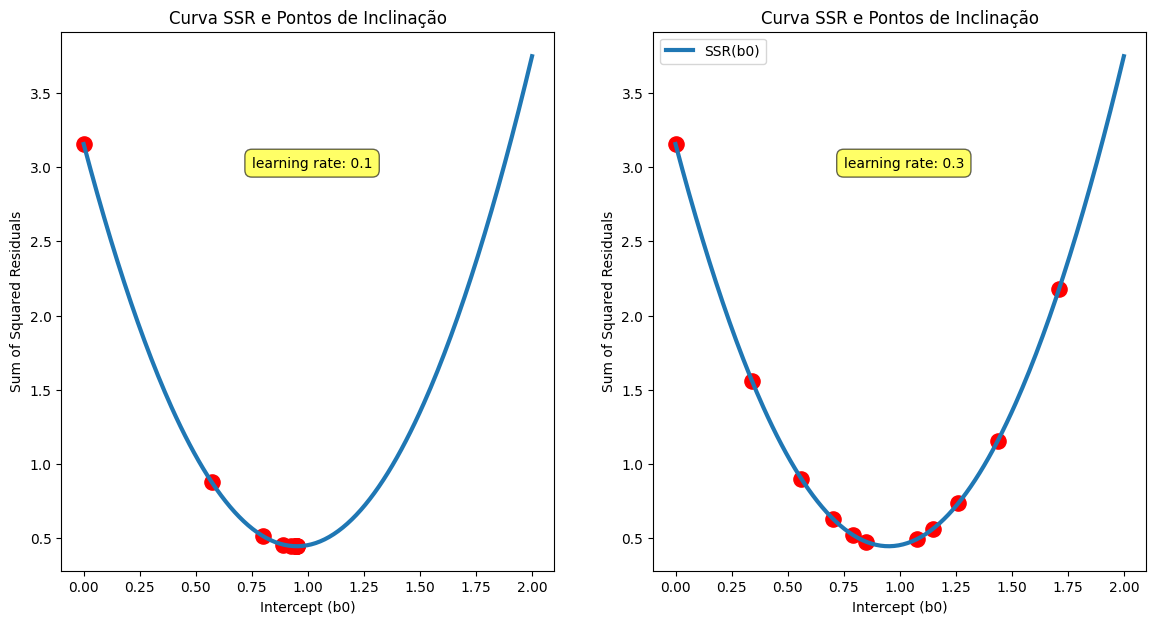

In [ ]:
# que recebe intercept e taxa de aprendizagem e realiza o
# Valores para o gráfico
b0_vals = np.linspace(0, 2, 200)
ssr_vals = np.array([ssr(b) for b in b0_vals])

# --- limitar domínio da reta tangente ---
b0_tan = np.linspace(-0.3, 0.3, 200)

fig, axes = plt.subplots(ncols=2, figsize=(14, 7))

# taxa de aprendizado atual
ct = 0

for ax in axes:
    # Plot
    ax.plot(b0_vals, ssr_vals, label=f"SSR(b0)", linewidth=3)

    for i in calcIntercepts(0, t[ct]):
        # Ponto de tangência em b0 = 0
        b0_tangent = i
        ssr_tangent = ssr(b0_tangent)
        slope_tangent = dssr(b0_tangent)

        # Marcar o ponto
        ax.scatter([b0_tangent], [ssr_tangent], color='red', s=120)

    ax.set_xlabel("Intercept (b0)")
    ax.set_ylabel("Sum of Squared Residuals")
    ax.set_title("Curva SSR e Pontos de Inclinação")
    ax.text(0.75, 3.0, 
                     f'learning rate: {t[ct]}', 
                     fontsize=10, 
                     bbox=dict(facecolor='yellow', alpha=0.6, boxstyle='round,pad=0.5'))

    ct += 1
plt.grid(False)
plt.legend()
plt.show()

# Parte 2
**Utilização de dois parâmetros de otimização: Slope e Intercept**

<a id="util-data-2"></a>
## Funções e dados utilitários
A primeira mudança fundamental será realizar a adaptação das funções **SSR e DSSR**, pois agora elas precisam lidar com duas variáveis, diferente do primeiro que apenas o **intercept** variava. Então nesse primeiro trecho apenas realizo as adaptações necessárias nas funções essenciais e alimento com mais alguns dados o meu código.

In [56]:
slope_initial = 0.5
intercept_initial = 0.0
learnig_rates = [0.01, 0.02]
N_ITERACOES = 80

# Função SSR adaptada
def ssr_new(i, s):
    return np.sum((y - (i + s * x))**2)

# função dssr adaptada para receber também o slope
def dssr_new(i, s):
    return np.sum(-2 * (y - (i + s * x)))

# função que recebe um valor slope e calcula a derivada
def dssr_slope(i, s):
    return np.sum(-2 * (x * (y - (i + s * x))))

<a id= "gradient"></a>
## Função gradient_descent_2p
Função que realiza o processo de cálculo dos novos pesos. A função utiliza as funções auxiliares adaptadas para esse problema. Ela recebe como argumento o **intercept inicial**, o **slope inicial**, o **learning rate** e o **número de interações** a serem feitas. Será retornado o estado final depois da última interação, assim como a lista de valores para **intercepts** e para **slopes**. Também é retornado uma lista de válores obtidos com a função erro **SSR** adicionando os novos valores de **intercept** e **slope**.

In [12]:
# Função Gradient
def gradient_descent_2p(i, s, lr, n_iter):
    i_atual = i
    s_atual = s
    historico_i = [i_atual]
    historico_s= [s_atual]
    
    for i in range(n_iter):
        grad_i = dssr_new(i_atual, s_atual)
        grad_s = dssr_slope(i_atual, s_atual)
        i_atual -= lr * grad_i
        s_atual -= lr * grad_s
        historico_i.append(i_atual)
        historico_s.append(s_atual)
    
    return i_atual, s_atual, historico_i, historico_s, [ssr_new(i, s) for i, s in zip(historico_i, historico_s)]

In [81]:
i_otimo, s_otimo, hist_i, hist_s, hist_ssr = gradient_descent_2p(
    intercept_initial, slope_initial, learnig_rates[0], N_ITERACOES
)

i_otimo1, s_otimo1, hist_i1, hist_s1, hist_ssr1 = gradient_descent_2p(
    intercept_initial, slope_initial, learnig_rates[1], N_ITERACOES
)

<a id="plot-2"></a>
## Função plplot_reta_iterativa(i, s, interation, ax)
Essa função realiza plot utilizando os dados da caixa de código anterior.

/tmp/ipykernel_412/970088468.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')


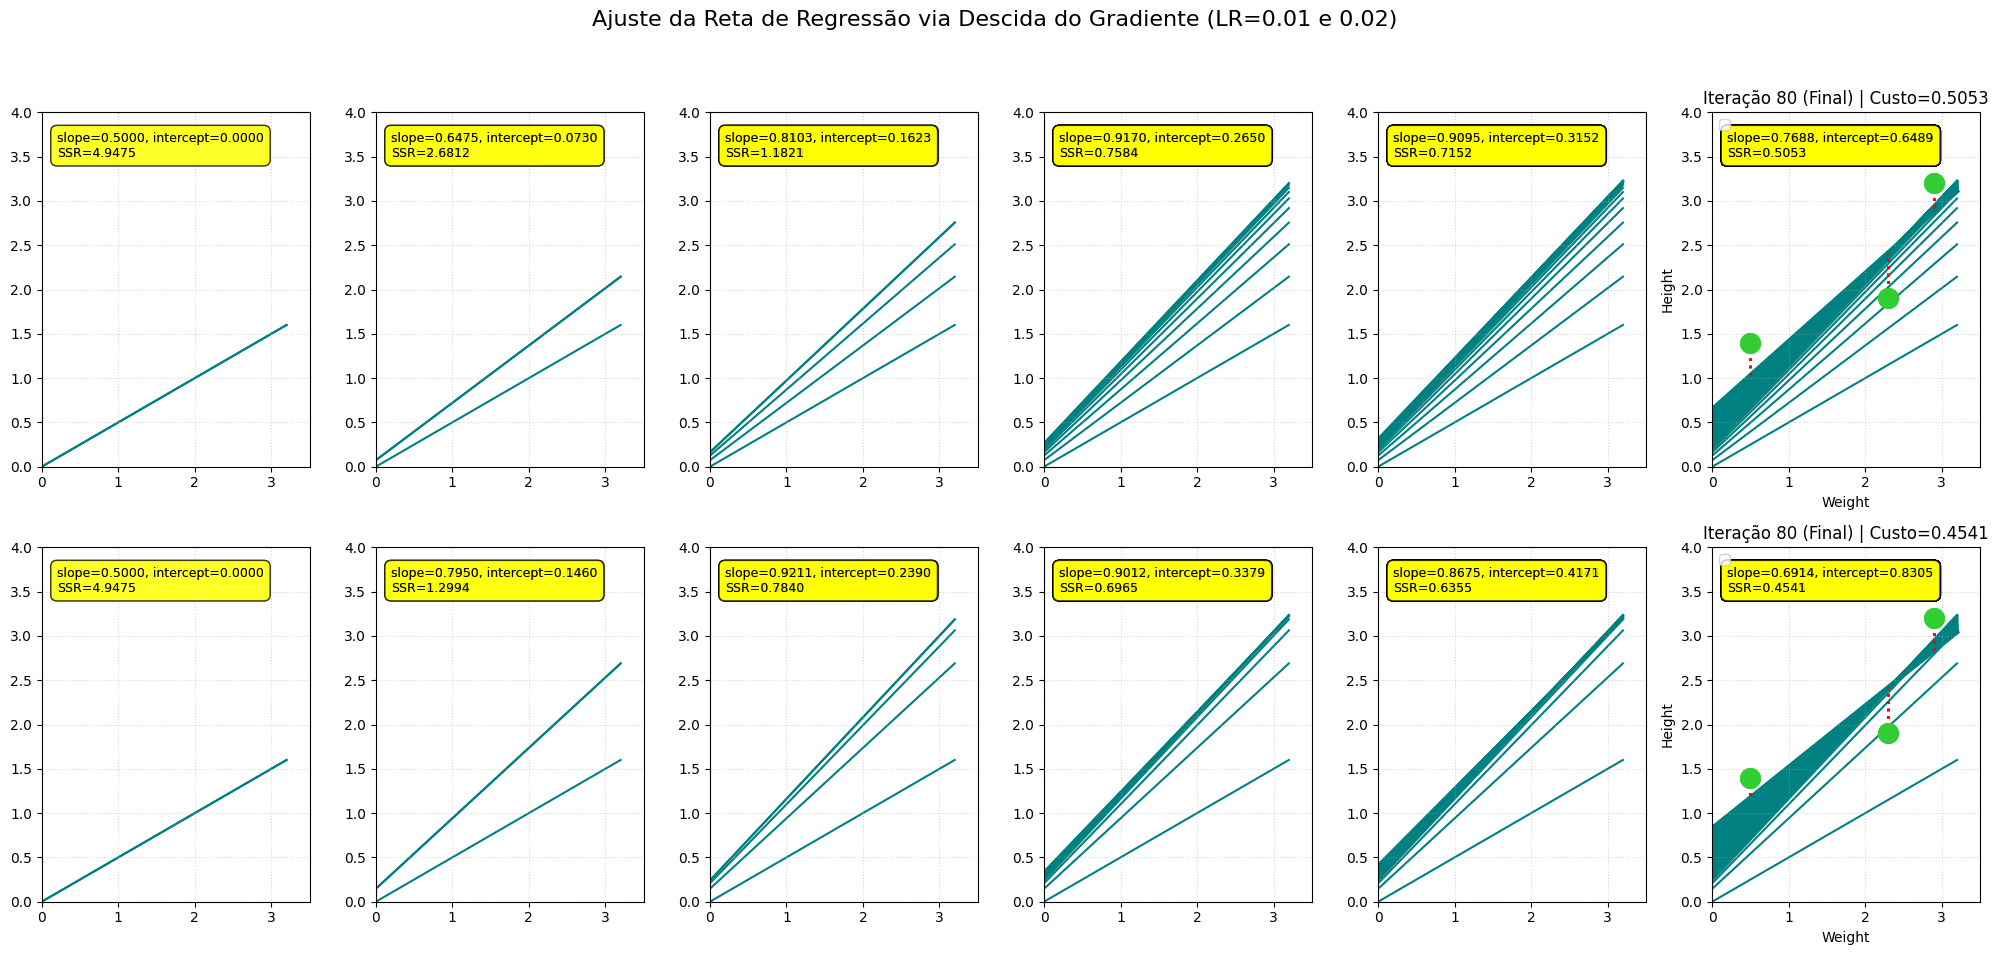

In [82]:

# Função de Plotagem Adaptada 

def plot_reta_iterativa(i, s, iteration, ax):
    """
    Plota a reta de regressão e resíduos para um dado par (w, b).
    Simula o estilo visual da imagem fornecida.
    """
    
    # Cria reta em domínio maior para visualização
    x_line = np.linspace(0, 3.2, 100)
    y_line = s * x_line + i

    # Reta (usando cor escura para a última iteração e clara para as anteriores)
    color = 'teal' # if iteration == len(hist_s) - 1 else 'lightblue'
    linewidth = 3 if iteration == len(hist_s) - 1 else 1.5
    alpha = 1.0 
    
    ax.plot(x_line, y_line, color=color, linewidth=linewidth, alpha=alpha, zorder=1)

    # Plotar Pontos Reais Apenas na Última Iteração
    if iteration == len(hist_s) - 1:
        # Pontos reais
        ax.scatter(x, y, color='limegreen', s=200, zorder=5)

        # Linhas de Resíduos (Erro)
        for xi, yi in zip(x, y):
            y_pred = s * xi + i
            ax.plot([xi, xi], [yi, y_pred], color='red', linewidth=2, linestyle= ':', zorder=4)

        ax.set_title(f"Iteração {iteration} (Final) | Custo={ssr_new(i, s):.4f}")
        ax.set_xlabel("Weight")
        ax.set_ylabel("Height")
        ax.legend(loc='upper left')

    # Adicionar informação de custo/parâmetros em cada plot
    ax.text(0.2, 3.5, 
            f'slope={s:.4f}, intercept={i:.4f}\nSSR={ssr_new(i, s):.4f}',
            fontsize=9, 
            bbox=dict(facecolor='yellow', alpha=0.6, boxstyle='round,pad=0.5'))

    ax.set_xlim(0, 3.5)
    ax.set_ylim(0, 4.0)
    ax.grid(True, linestyle=':', alpha=0.5)

# Plotagem das Retas 

plot_indices = [0, 1, 3, 9, 15, N_ITERACOES] 

fig, axes = plt.subplots(ncols=len(plot_indices), nrows=2, figsize=(20, 10))
fig.suptitle(f"Ajuste da Reta de Regressão via Descida do Gradiente (LR={learnig_rates[0]} e {learnig_rates[1]})", fontsize=16)

for k in range(2):
    if (k == 0):
        for i, index in enumerate(plot_indices):
            s_iter = hist_s[index]
            i_iter = hist_i[index]
    
            # e a reta atual em destaque.
            for j in range(index + 1):
                plot_reta_iterativa(hist_i[j], hist_s[j], j, axes[k][i])

            # garante que a reta final esteja em destaque
            plot_reta_iterativa(i_iter, s_iter, index, axes[k][i])
    else:
        for i, index in enumerate(plot_indices):
            s_iter = hist_s1[index]
            i_iter = hist_i1[index]
    
            # e a reta atual em destaque.
            for j in range(index + 1):
                plot_reta_iterativa(hist_i1[j], hist_s1[j], j, axes[k][i])

            # garante que a reta final esteja em destaque
            plot_reta_iterativa(i_iter, s_iter, index, axes[k][i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

